In [17]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from youtube_api import api_key

url = "https://www.googleapis.com/youtube/v3/videos?id=w2Ov5jzm3j8&key=" + api_key + "&part=statistics"

In [18]:
youtube_response = requests.get(url).json()
youtube_json = json.dumps(youtube_response)
youtube_json


'{"kind": "youtube#videoListResponse", "etag": "\\"p4VTdlkQv3HQeTEaXgvLePAydmU/j_-Sp6QyGUJCK6dapIRtIlr03ow\\"", "pageInfo": {"totalResults": 1, "resultsPerPage": 1}, "items": [{"kind": "youtube#video", "etag": "\\"p4VTdlkQv3HQeTEaXgvLePAydmU/xu49_66QjL0gJO5eHx_6geZXUG8\\"", "id": "w2Ov5jzm3j8", "statistics": {"viewCount": "347805985", "likeCount": "9301969", "dislikeCount": "259042", "favoriteCount": "0", "commentCount": "319819"}}]}'

In [19]:
view_count = youtube_response["items"][0]["statistics"]["viewCount"]
like_count = youtube_response["items"][0]["statistics"]["likeCount"]
dislike_count = youtube_response["items"][0]["statistics"]["dislikeCount"]
comment_count = youtube_response["items"][0]["statistics"]["commentCount"]

statistics_list = [{"View Count": view_count,
                   "Like Count": like_count,
                   "Dislike Count": dislike_count,
                   "Comment Count": comment_count}]

statistics_df = pd.DataFrame(statistics_list)
statistics_df

,Comment Count,Dislike Count,Like Count,View Count
0,319819,259042,9301969,347805985


In [20]:
# lets make a triple stacked comparison
statistics_list = []
video_list = []
video_name_list = ["Old Town Road (Official Movie)", "Panini (Official Video)"]
video_id_list = ["w2Ov5jzm3j8", "bXcSLI58-h8"]
for video in video_id_list:
    url =  "https://www.googleapis.com/youtube/v3/videos?id=" + video + "&key=" + api_key + "&part=statistics"
    youtube_response = requests.get(url).json()
    video_list.append(youtube_response)    

view_count_list = []
like_count_list = []  
dislike_count_list = []  
comment_count_list = []  
    
for videos in video_list:
    view_count_list.append(videos["items"][0]["statistics"]["viewCount"])
    like_count_list.append(videos["items"][0]["statistics"]["likeCount"])
    dislike_count_list.append(videos["items"][0]["statistics"]["dislikeCount"])
    comment_count_list.append(videos["items"][0]["statistics"]["commentCount"])
    
statistics_df = pd.DataFrame(view_count_list, columns=["View Count"])
statistics_df["Like Count"] = like_count_list
statistics_df["Dislike Count"] = dislike_count_list
statistics_df["Comment Count"] = comment_count_list
statistics_df["Video Name"] = video_name_list

statistics_df["Video Name"] = statistics_df["Video Name"].astype(str)
statistics_df["View Count"] = statistics_df["View Count"].astype(int)
statistics_df["Like Count"] = statistics_df["Like Count"].astype(int)
statistics_df["Dislike Count"] = statistics_df["Dislike Count"].astype(int)
statistics_df["Comment Count"] = statistics_df["Comment Count"].astype(int)

# statistics_df = statistics_df.set_index("Video Name")
statistics_df

,View Count,Like Count,Dislike Count,Comment Count,Video Name
0,347805985,9301969,259042,319819,Old Town Road (Official Movie)
1,97703344,3315178,115257,205210,Panini (Official Video)


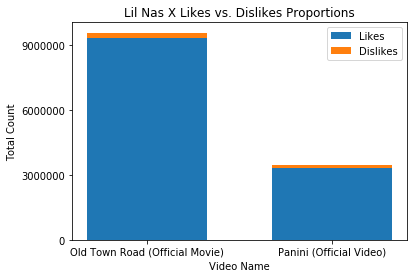

In [21]:
n = 2
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["Dislike Count"], width, bottom=statistics_df["Like Count"])

plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Likes vs. Dislikes Proportions')
plt.yticks(np.arange(0,12000000,3000000))
plt.legend((p1[0], p2[0]), ['Likes', 'Dislikes'], loc=1)

plt.savefig('Dislikes_vs_likes.png')
plt.show()


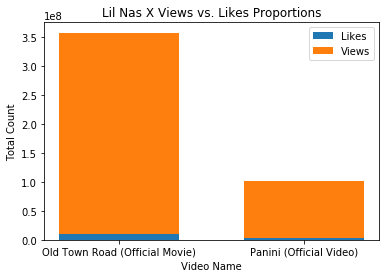

In [25]:
n = 2
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["View Count"], width, bottom=statistics_df["Like Count"])

plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Views vs. Likes Proportions')
# plt.yticks(np.arange(0,15000000,5000000))
plt.legend((p1[0], p2[0]), ['Likes', 'Views'], loc=1)

plt.savefig('Views_vs_likes.png')
plt.show()



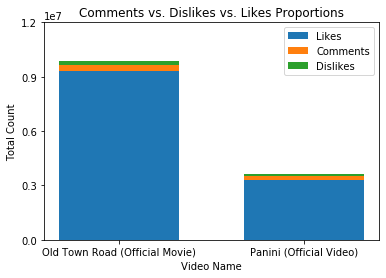

In [24]:
n = 3
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["Comment Count"], width, bottom=statistics_df["Like Count"])
p3 = plt.bar(statistics_df["Video Name"], statistics_df["Dislike Count"], width, bottom=statistics_df["Like Count"]+statistics_df["Comment Count"])


plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Comments vs. Dislikes vs. Likes Proportions')
plt.yticks(np.arange(0,15000000,3000000))
plt.legend((p1[0], p2[0], p3[0]), ['Likes', 'Comments', 'Dislikes'], loc=1)

plt.savefig('Comments_vs_Dislikes_vs_Likes.png')
plt.show()




In [31]:
# lets try other videos
statistics_list = []
video_list = []
video_name_list = ["Lil Nas X, Cardi B - Rodeo", "Lil Nas X - C7osure (You Like)", "Lil Nas X - Bring U Down", 
                   "Lil Nas X - Kick It", "Old Town Road (Official Movie)", "Old Town Road (Remix) [Lyric Video]",
                   "Old Town Road (Area 51 Video)", "Old Town Road (Week 17 Version)", "Old Town Road (Seoul Town Road Remix)",
                  "Panini (Official Video)"]

video_id_list = ["kx0Z0B8Xox0", "eLgxYjZEflI", "c_mR-dt_c3g",
                 "JTx-l_rDZP4","w2Ov5jzm3j8", "loSuMqwQA38", 
                 "aA7xDP9sQzk", "r7qovpFAGrQ", "jzlkfIWu70w",
                "bXcSLI58-h8"]

for video in video_id_list:
    url =  "https://www.googleapis.com/youtube/v3/videos?id=" + video + "&key=" + api_key + "&part=statistics"
    youtube_response = requests.get(url).json()
    video_list.append(youtube_response)    

view_count_list = []
like_count_list = []  
dislike_count_list = []  
comment_count_list = []  
    
for videos in video_list:
    view_count_list.append(videos["items"][0]["statistics"]["viewCount"])
    # view_count_list.append(int(videos["items"][0]["statistics"]["viewCount"]))
    like_count_list.append(videos["items"][0]["statistics"]["likeCount"])
    dislike_count_list.append(videos["items"][0]["statistics"]["dislikeCount"])
    comment_count_list.append(videos["items"][0]["statistics"]["commentCount"])
    
statistics_df = pd.DataFrame(view_count_list, columns=["View Count"])
statistics_df["Like Count"] = like_count_list
statistics_df["Dislike Count"] = dislike_count_list
statistics_df["Comment Count"] = comment_count_list
statistics_df["Video Name"] = video_name_list

statistics_df["Video Name"] = statistics_df["Video Name"].astype(str)
statistics_df["View Count"] = statistics_df["View Count"].astype(int)
# above line would be removed
statistics_df["Like Count"] = statistics_df["Like Count"].astype(int)
statistics_df["Dislike Count"] = statistics_df["Dislike Count"].astype(int)
statistics_df["Comment Count"] = statistics_df["Comment Count"].astype(int)

# lets add new statistics to the table
statistics_df["Percentage Dislikes"] = 100*(statistics_df["Dislike Count"]/(statistics_df["Like Count"] +statistics_df["Dislike Count"]))
statistics_df["Percentage Likes"] = 100*(statistics_df["Like Count"]/(statistics_df["Like Count"] +statistics_df["Dislike Count"]))


# statistics_df = statistics_df.set_index("Video Name")
statistics_df

,View Count,Like Count,Dislike Count,Comment Count,Video Name,Percentage Dislikes,Percentage Likes
0,60764739,1399054,48941,85980,"Lil Nas X, Cardi B - Rodeo",3.379915,96.620085
1,7292139,206088,6222,21714,Lil Nas X - C7osure (You Like),2.930620,97.069380
2,3003240,106690,2752,6652,Lil Nas X - Bring U Down,2.514574,97.485426
3,6270056,173586,6140,11613,Lil Nas X - Kick It,3.416311,96.583689
4,347809809,9302038,259045,319830,Old Town Road (Official Movie),2.709369,97.290631
5,29434912,552237,61304,54675,Old Town Road (Remix) [Lyric Video],9.991834,90.008166
6,10773501,485668,26985,43942,Old Town Road (Area 51 Video),5.263794,94.736206
7,69872826,952379,35989,27428,Old Town Road (Week 17 Version),3.641255,96.358745
8,13777617,738746,40801,62069,Old Town Road (Seoul Town Road Remix),5.233937,94.766063
9,97716376,3315288,115269,205183,Panini (Official Video),3.360067,96.639933


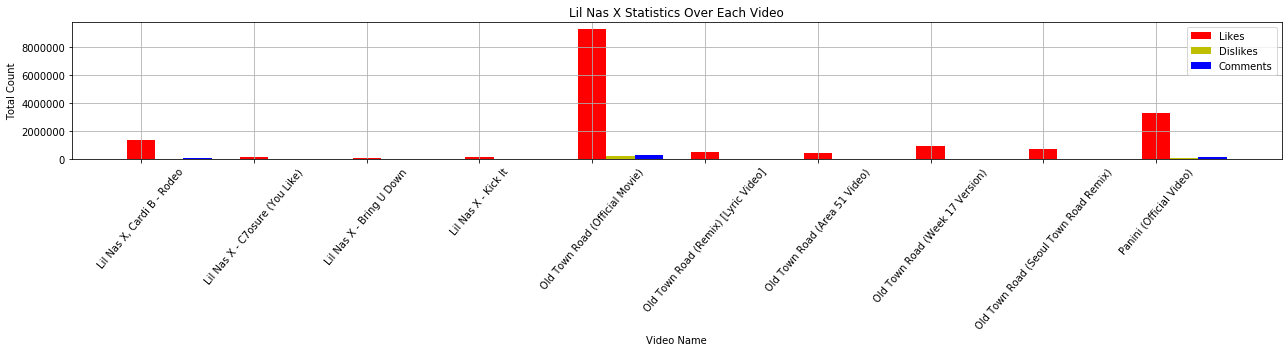

In [32]:
n = 10
ind = np.arange(n)
width = 0.25

fig, ax = plt.subplots(figsize=(18,5))
pbar1 = plt.bar(ind, statistics_df["Like Count"], width, color='r')
pbar2 = plt.bar(ind+width, statistics_df["Dislike Count"], width, color='y')
pbar3 = plt.bar(ind+width+width, statistics_df["Comment Count"], width, color='b')
plt.xticks(rotation = 50)

plt.xticks(ind, statistics_df["Video Name"])
plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Statistics Over Each Video')

plt.legend((pbar1[0], pbar2[0], pbar3[0]), ['Likes', 'Dislikes', 'Comments'], loc=1)
plt.grid()
plt.tight_layout()

plt.savefig('Statistics_Over_Each_Videos.png')
plt.show()

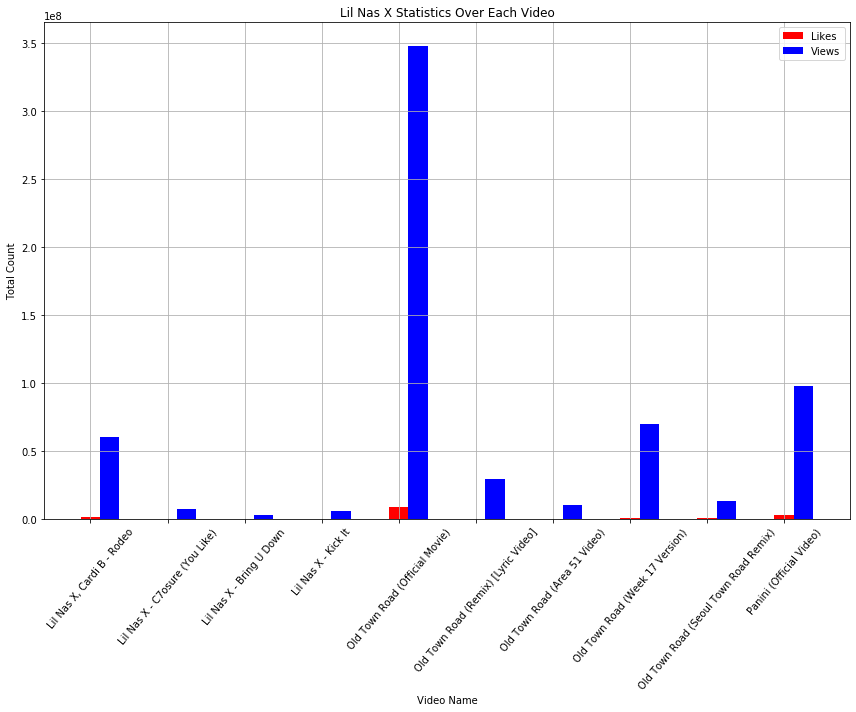

In [36]:
n = 10
ind = np.arange(n)
width = 0.25

fig, ax = plt.subplots(figsize=(12,10))
pbar1 = plt.bar(ind, statistics_df["Like Count"], width, color='r')
pbar3 = plt.bar(ind+width, statistics_df["View Count"], width, color='b')
plt.xticks(rotation = 50)

plt.xticks(ind, statistics_df["Video Name"])
plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Statistics Over Each Video')

plt.legend((pbar1[0], pbar3[0]), ['Likes', 'Views'], loc=1)
plt.grid()
plt.tight_layout()

plt.savefig('Views_Over_Each_Videos.png')
plt.show()